In [22]:
from pandas import read_pickle, DataFrame

In [3]:
data = read_pickle("data/data_all_features.pkl")

In [4]:
X_train = data.get("X_train")
y_train = data.get("y_train")
X_test = data.get("X_test")
feature_names = data.get("feature_names")
categorical = data.get("categorical")
numerical = data.get("numerical")
id_numeration_train = data.get("id_numeration_train")
id_numeration_test = data.get("id_numeration_test")

In [15]:
def get_visitor_dataframe(X_train, y_train):
    visitor_dataframe = DataFrame(columns=feature_names, data=X_train)
    visitor_dataframe["totals_transaction_revenue"] = y_train
    return visitor_dataframe

def remove_non_paying_visitors(visitor_dataframe):
    visits_with_positive_revenue = visitor_dataframe[visitor_dataframe["totals_transaction_revenue"] > 0]
    return visits_with_positive_revenue

In [16]:
visitor_dataframe = get_visitor_dataframe(X_train, y_train)


In [38]:
paying_visitor_dataframe = remove_non_paying_visitors(visitor_dataframe)

In [39]:
paying_visitor_dataframe.head()

,visitNumber,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,trafficSource_adwordsClickInfo.page,trafficSource_isTrueDirect,device_isMobile,channelGrouping_Affiliates,channelGrouping_Direct,...,geoNetwork_country,geoNetwork_networkDomain,geoNetwork_region,trafficSource_adContent,trafficSource_campaign,trafficSource_keyword,trafficSource_source,trafficSource_referralPath,weekday,totals_transaction_revenue
751,1.0,0.0,11.0,1.0,11.0,0.0,1.0,0.0,0.0,1.0,...,33.0,2.0,38.0,0.0,0.0,0.0,8.0,0.0,4.0,37860000.0
752,3.0,0.0,11.0,0.0,10.0,0.0,1.0,0.0,0.0,0.0,...,33.0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,4.0,306670000.0
798,7.0,0.0,13.0,0.0,11.0,0.0,1.0,0.0,0.0,0.0,...,33.0,2.0,26.0,0.0,0.0,0.0,9.0,0.0,4.0,68030000.0
801,6.0,0.0,13.0,0.0,12.0,0.0,1.0,0.0,0.0,0.0,...,33.0,2.0,21.0,0.0,0.0,0.0,9.0,0.0,4.0,26250000.0
857,4.0,0.0,17.0,0.0,14.0,0.0,1.0,0.0,0.0,0.0,...,33.0,2.0,1.0,0.0,0.0,0.0,9.0,0.0,4.0,574150000.0


In [78]:
def get_filtered_paying_visitors(paying_visitor_dataframe, minimum_amount, maximum_value):
    filtered_paying_visitors = paying_visitor_dataframe[paying_visitor_dataframe["totals_transaction_revenue"] > minimum_amount]
    filtered_paying_visitors = filtered_paying_visitors[filtered_paying_visitors["totals_transaction_revenue"] < maximum_amount]
    return filtered_paying_visitors

In [100]:
import numpy as np
import matplotlib.pyplot as plt

def get_category_total(paying_visitor_dataframe):
    return sum(paying_visitor_dataframe["totals_transaction_revenue"]) / 1000000

def plot_visitor_transactions(paying_visitor_dataframe, category_total, minimum_value=None, maximum_value=None):
    totals_transaction_revenue = paying_visitor_dataframe["totals_transaction_revenue"]
    plt.hist(np.array(totals_transaction_revenue), bins=100, edgecolor='black')
    plt.xlabel('Revenue')
    plt.ylabel('Frequency')
    plt.title(f'between {minimum_value} - {maximum_value} | total in category {category_total} M')
    plt.show()
    return category_total

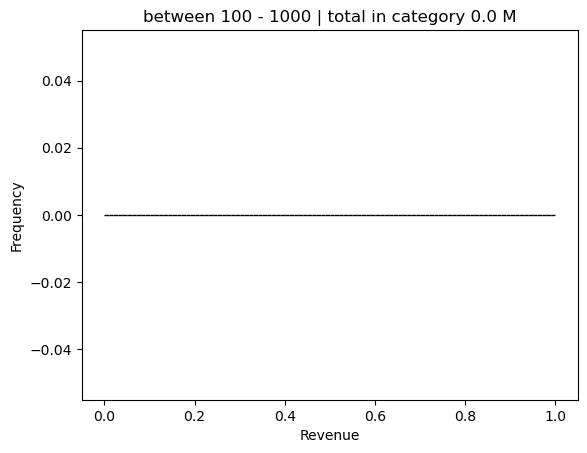

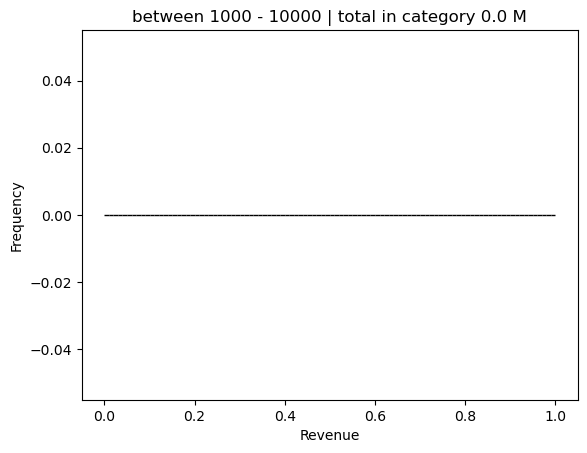

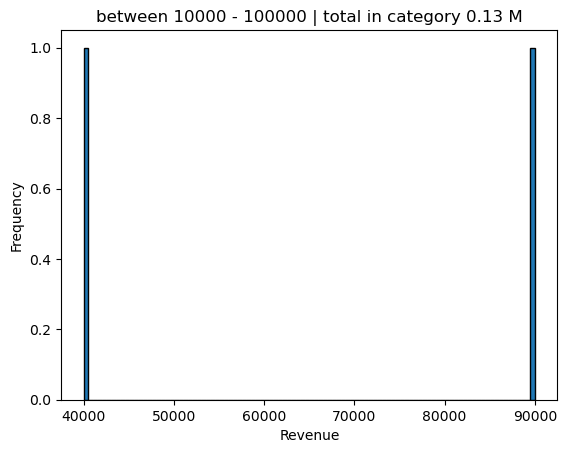

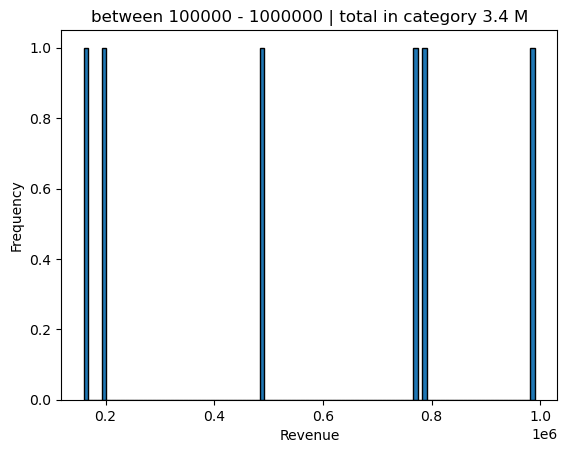

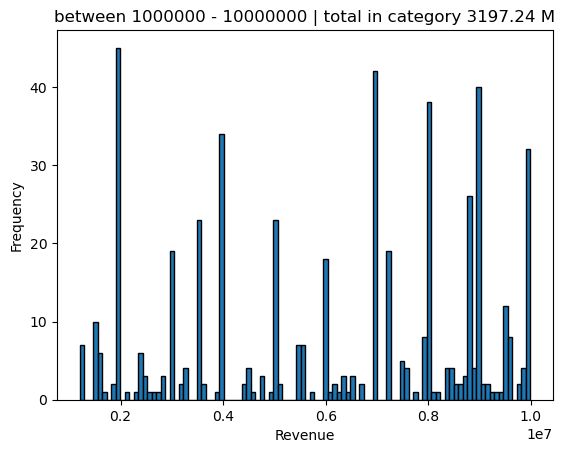

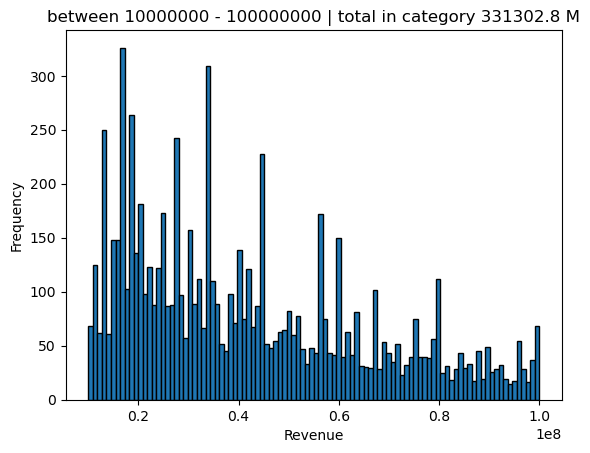

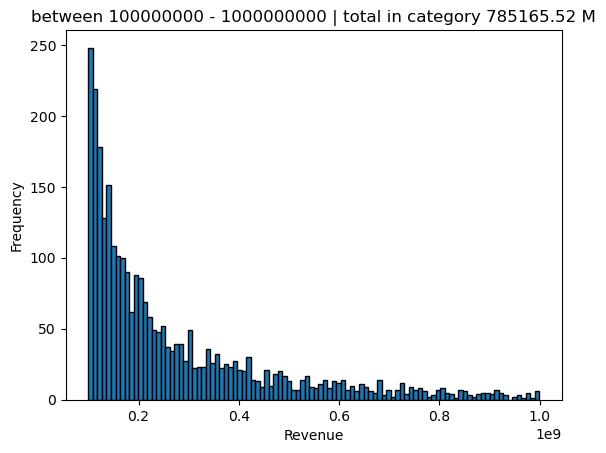

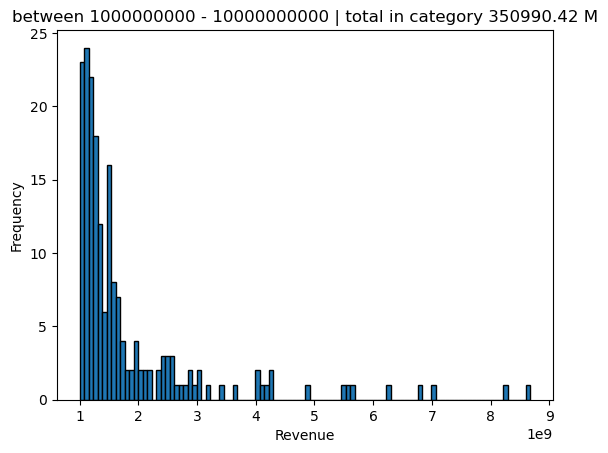

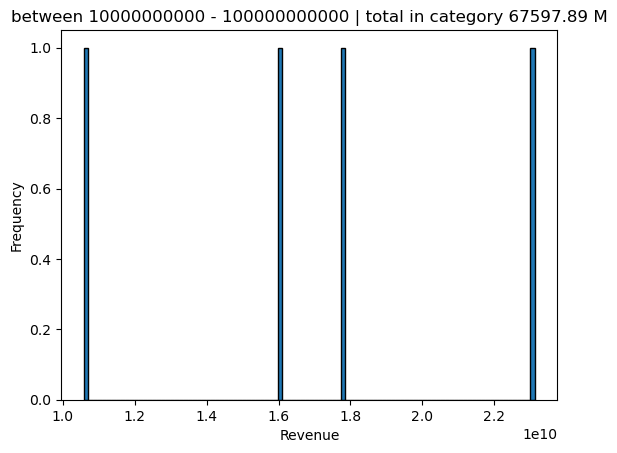

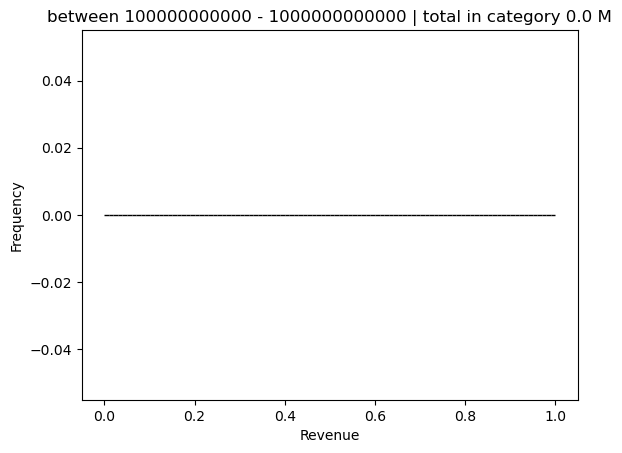

In [101]:
amount_list = [
    [100, 1000],
    [1000,10000],
    [10000,100000],
    [100000,1000000],
    [1000000,10000000],
    [10000000,100000000],
    [100000000,1000000000],
    [1000000000, 10000000000],
    [10000000000, 100000000000],
    [100000000000, 1000000000000]
]

category_total_list = []
for amount in amount_list:
    minimum_amount = amount[0]
    maximum_amount = amount[1]
    high_paying_visitors = get_filtered_paying_visitors(paying_visitor_dataframe, minimum_amount, maximum_amount)
    cateogry_total = get_category_total(high_paying_visitors)
    category_total = plot_visitor_transactions(high_paying_visitors, cateogry_total, minimum_amount, maximum_amount)
    category_total_list.append(category_total)

In [97]:
category_total_list

[0.0, 0.0, 0.013, 0.34, 319.724, 33130.28, 78516.552, 35099.042, 6759.789, 0.0]